# Resolution Calculation using Covariance Matrix - pick E,q pairs

Instrument: ARCS
* Ei=?
* Fermi chopper: 600 Hz
* T0: 120Hz

Sample: Si
* hkl: -16/3.,-8/3.,8/3.
* E: 40

In [1]:
# some goodies
%matplotlib notebook
# %matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import mcvine.cli
from mcvine_workflow.DGS import ARCS

In [2]:
import histogram.hdf as hh, histogram as H

In [3]:
workdir = '/SNS/users/lj7/simulations/ARCS/resolution-demo/'
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/lj7/simulations/ARCS/resolution-demo


## Formula
See NIMA 736(2014)31-39

## Inputs

### ARCS parameters

In [4]:
L_PM=11.61
R = 3.
L_PS=13.6
L_MS=L_PS-L_PM

In [5]:
print L_MS

1.99


### Sample

In [7]:
%%file Si.yml
name: Si
chemical_formula: Si2
lattice: 
 constants: 5.490700041, 5.490700041, 5.490700041, 90, 90, 90
 basis_vectors:
  - 5.490700041, 0, 0
  - 0, 5.490700041, 0
  - 0, 0, 5.490700041
 primitive_basis_vectors:
  - 0.0, 2.71526503565, 2.71526503565
  - 2.71526503565, 0.0, 2.71526503565
  - 2.71526503565, 2.71526503565, 0.0
excitations:
  - type: deltafunction
    hkl: -16/3.,-8/3.,8/3.
    E: 40.
    dE: 0.5
orientation:
 u: -1, 1, -1
 v: 2, 1, -1
shape: hollowCylinder in_radius="5./8*inch" out_radius="1.*inch" height="1.5*inch"
temperature: 100*K

Overwriting Si.yml


In [6]:
sample_yml = './Si.yml'

### ** Dynamics parameters

In [15]:
Ei = 30

In [16]:
hkl0 = np.array([-16/3.,-8/3.,8/3.])
hkl_dir = np.array([-1,1,-1]) # projection

### ** Other parameters

In [17]:
# scan
psimin = -5
psimax = 90.
dpsi = 1.

### Dynamic range
Use the following code to explore the dynamic range

In [18]:
from mcvine_workflow.singlextal import dynrange
from mcvine_workflow.sample import loadSampleYml
sample = loadSampleYml(sample_yml)
psilist = np.arange(psimin, psimax, 5*dpsi)
qaxis = np.arange(-100, 100, .02)

<IPython.core.display.Javascript object>


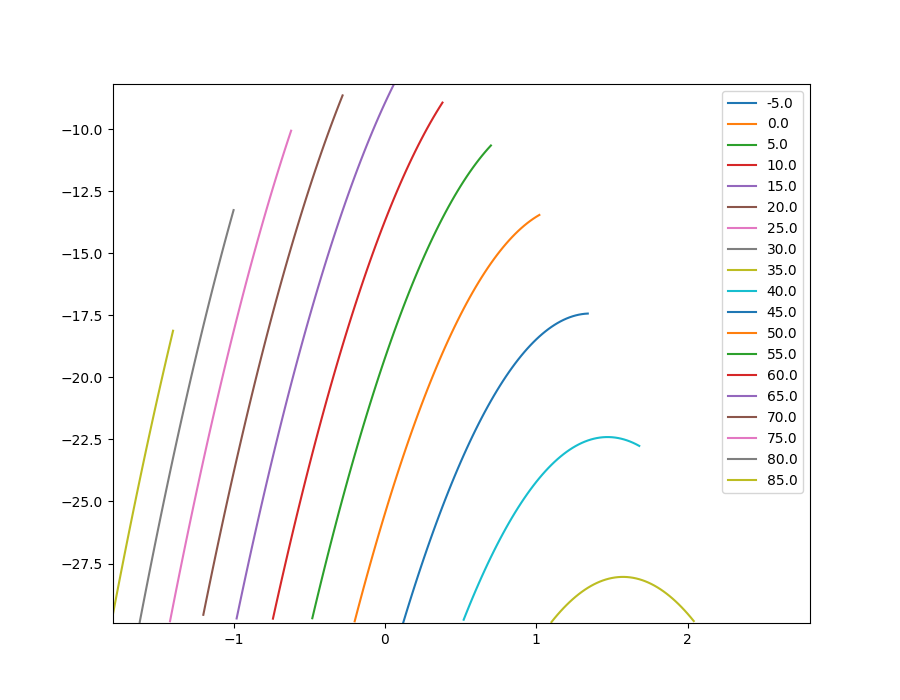

(-29.893424989955548, -8.1856495609191242)

In [19]:
plt.figure(figsize=(9,7))
points_in_slice = list(dynrange.iterPointsInSlice(
        sample, psilist, Ei, hkl0, hkl_dir, qaxis,
        ARCS.scattering_angle_constraints,
        Erange=(-Ei, Ei)))
all_qs = np.concatenate([qs for _p, qs, _E in points_in_slice ])
qmin = np.min(all_qs); qmax = np.max(all_qs)

all_Es = np.concatenate([Es for _p, _q, Es in points_in_slice ])
Emin = np.min(all_Es); Emax = np.max(all_Es)

for psi, qs, Es in points_in_slice:
    plt.plot(qs, Es, label=str(psi))
    continue
    
plt.legend()
plt.xlim(qmin, qmax+(qmax-qmin)/5)
plt.ylim(Emin, Emax)

In [12]:
psilist = np.arange(psimin, psimax, dpsi)
points_in_slice = list(dynrange.iterPointsInSlice(
        sample, psilist, Ei, hkl0, hkl_dir, qaxis,
        ARCS.scattering_angle_constraints,
        Erange=(-Ei, Ei)))
all_qs = np.concatenate([qs for _p, qs, _E in points_in_slice ])
qmin = np.min(all_qs); qmax = np.max(all_qs)

all_Es = np.concatenate([Es for _p, _q, Es in points_in_slice ])
Emin = np.min(all_Es); Emax = np.max(all_Es)

In [13]:
fractions = [.9, .5, .25, 1./8, 1./16, 1./32, 1./64, 1./128]
Eq_pairs = []
for f in fractions:
    E = f*Ei
    print 'E=', E
    # find maximum Es smaller than E
    max_Es_smaller = np.max(all_Es[all_Es<E])
    # find minimum Es greater than E
    min_Es_greater = np.min(all_Es[all_Es>E])
    # print E, max_Es_smaller, min_Es_greater
    Ebracket = min(max_Es_smaller, E*.99), max(min_Es_greater, E*1.01)
    # get qs
    qs = all_qs[ (all_Es>=Ebracket[0])*(all_Es<=Ebracket[1]) ]
    # print len(qs)
    while len(qs) < 10:
        Ebracket = Ebracket[0]*.95, Ebracket[1]*1.05
        qs = all_qs[ (all_Es>=Ebracket[0])*(all_Es<=Ebracket[1]) ]
    print "Ebracket=", Ebracket, 'number of qs=', len(qs)
    Eq_pairs.append( (E, np.mean(qs)))
Eq_pairs = np.array(Eq_pairs)

E= 112.5
Ebracket= (111.375, 113.625) number of qs= 365
E= 62.5
Ebracket= (61.875, 63.125) number of qs= 184
E= 31.25
Ebracket= (30.9375, 31.5625) number of qs= 80
E= 15.625
Ebracket= (15.46875, 15.78125) number of qs= 37
E= 7.8125
Ebracket= (7.734375, 7.890625) number of qs= 22
E= 3.90625
Ebracket= (3.6681836246217721, 4.142578125) number of qs= 63
E= 1.953125
Ebracket= (1.8369140625, 2.0712890625) number of qs= 30
E= 0.9765625
Ebracket= (0.91845703125, 1.03564453125) number of qs= 15


In [14]:
print Ei
print Eq_pairs

125
[[ 112.5           0.98147945]
 [  62.5           1.43804348]
 [  31.25          1.13425   ]
 [  15.625         1.12216216]
 [   7.8125        0.95545455]
 [   3.90625       1.18285714]
 [   1.953125      1.09533333]
 [   0.9765625     1.964     ]]


In [42]:
print Ei
print Eq_pairs

1000
[[ 900.            8.76547972]
 [ 500.            0.93846678]
 [ 250.           -1.29634409]
 [ 125.           -2.20098765]
 [  62.5          -2.55897436]
 [  31.25         -2.76315789]
 [  15.625        -2.8837931 ]
 [   7.8125       -3.25333333]]


In [45]:
print Ei
print Eq_pairs

500
[[  4.50000000e+02   2.61495327e-01]
 [  2.50000000e+02  -1.29634409e+00]
 [  1.25000000e+02  -2.20098765e+00]
 [  6.25000000e+01  -2.55897436e+00]
 [  3.12500000e+01  -2.76315789e+00]
 [  1.56250000e+01  -2.88379310e+00]
 [  7.81250000e+00  -3.25333333e+00]
 [  3.90625000e+00  -2.90666667e+00]]


In [48]:
print Ei
print Eq_pairs

250
[[ 225.           -1.47519481]
 [ 125.           -2.20098765]
 [  62.5          -2.55897436]
 [  31.25         -2.76315789]
 [  15.625        -2.8837931 ]
 [   7.8125       -3.25333333]
 [   3.90625      -2.90666667]
 [   1.953125     -2.664     ]]


In [51]:
print Ei
print Eq_pairs

125
[[ 112.5          -2.112     ]
 [  62.5          -2.55897436]
 [  31.25         -2.76315789]
 [  15.625        -2.8837931 ]
 [   7.8125       -3.25333333]
 [   3.90625      -2.90666667]
 [   1.953125     -2.664     ]
 [   0.9765625    -2.166     ]]


In [54]:
print Ei
print Eq_pairs

60
[[ 54.          -2.516     ]
 [ 30.          -2.81666667]
 [ 15.          -2.81      ]
 [  7.5         -3.00296296]
 [  3.75        -2.77166667]
 [  1.875       -3.41636364]
 [  0.9375      -2.044     ]
 [  0.46875     -2.99166667]]


In [57]:
print Ei
print Eq_pairs

30
[[ 27.          -3.154     ]
 [ 15.          -2.81      ]
 [  7.5         -3.00296296]
 [  3.75        -2.77166667]
 [  1.875       -3.41636364]
 [  0.9375      -2.044     ]
 [  0.46875     -2.99166667]
 [  0.234375    -2.47272727]]
